# IKpy Quickstart #

# Requirements

First, you need to install IKPy (see [installations instructions](https://github.com/Phylliade/ikpy)).
You also need a URDF file.  
By default, we use the files provided in the [resources](https://github.com/Phylliade/ikpy/tree/master/resources) folder of the IKPy repo.

Import the IKPy module : 

In [75]:
import ikpy.chain
import numpy as np
import ikpy.utils.plot as plot_utils

# Orientation : Roll Pitch Yaw : 0.0 1.5 0


The basic element of IKPy is the kinematic `Chain`.
To create a chain from an URDF file : 

In [91]:
my_chain = ikpy.chain.Chain.from_urdf_file("urdf/niryo_one_v1.urdf")
my_chain_mesh = ikpy.chain.Chain.from_urdf_file("urdf/niryo_one_v1_without_mesh.urdf")

my_chain_v2 = ikpy.chain.Chain.from_urdf_file("urdf/niryo_one_v2.urdf")
my_chain_mesh_v2 = ikpy.chain.Chain.from_urdf_file("urdf/niryo_one_v2_without_mesh.urdf")

my_urdf = ikpy.chain.Chain.from_urdf_file("new_urdf/niryo_one_v2.urdf")

Note : as mentioned before, here we use a file in the resource folder.

# Inverse kinematics

In Inverse Kinematics, you want your kinematic chain to reach a 3D position in space.

To have a more general representation of position, IKPy works with homogeneous coordinates. It is a 4x4 matrix storing both position and orientation.
Prepare your desired position as a 4x4 matrix. Here we only consider position, not orientation of the chain.

In [107]:
forward_v2 = my_chain_v2.forward_kinematics([0.25, 0, 0.14, 0, 0, 0, 0, 0])
print("Forward v2 : "+str(forward_v2[:3, 3]))

ik_v2 = my_chain_v2.inverse_kinematics(target_position=forward_v2[:3, 3])
print("\n\n\nJoint v2: "+str(ik_v2))

position = my_chain_v2.forward_kinematics(ik_v2)[:3, 3]
print("Position v2"+str(position))

position[2]-=0.1
print("New position "+str(position))
ik_v2 = my_chain_v2.inverse_kinematics(target_position=position)
print("Joint v2: "+str(ik_v2))

# le bras monte en Z, Le X il bouge gauche droite et le Y ducoup il doit reculer

# De ce que j'ai compris : Position z y x 

Forward v2 : [2.10078102e-01 2.02798416e-12 4.49421623e-01]



Joint v2: [ 0.          0.04652973  0.13782325 -0.02556904 -1.70369135 -0.18915911
  0.          0.        ]
Position v2[ 2.10078128e-01 -1.39237638e-09  4.49421638e-01]
New position [ 2.10078128e-01 -1.39237638e-09  3.49421638e-01]
Joint v2: [ 0.         -0.00362871  0.16291391 -0.44646643  0.7214051   0.1805721
  0.          0.        ]


In [72]:
forward = my_chain.forward_kinematics([0.14, 0, 0.25, 0, 1.57, 0, 0, 0])
print("Forward : "+str(forward[:3, 3]))

forward_mesh = my_chain_mesh.forward_kinematics([0.25, 0, 0.14, 0, 1.57, 0, 0, 0])
print("Forward no mesh : "+str(forward_mesh[:3, 3]))

forward_v2 = my_chain_v2.forward_kinematics([0.25, 0, 0.14, 0, 1.57, 0, 0, 0])
print("Forward v2 : "+str(forward_v2[:3, 3]))

forward_mesh_v2 = my_chain_mesh_v2.forward_kinematics([0.25, 0, 0.14, 0, 1.57, 0, 0, 0])
print("Forward no mesh v2 : "+str(forward_mesh_v2[:3, 3]))

Forward : [1.67812765e-01 1.86682009e-12 4.75655493e-01]
Forward no mesh : [1.98925744e-01 2.02560244e-12 4.55464512e-01]
Forward v2 : [0.20931123 0.0055     0.45486347]
Forward no mesh v2 : [0.20931123 0.0055     0.45486347]


In [71]:
#from ikpy.chain import Chain
#my_chain = Chain.from_urdf_file("model.urdf")
# my_chain.inverse_kinematics([2, 2, 2])

ik = my_chain.inverse_kinematics(target_position=forward[:3, 3])
print("Joint : "+str(ik))
print("Position"+str(my_chain.forward_kinematics(ik)[:3, 3]))

ik_mesh = my_chain_mesh.inverse_kinematics(target_position=[0.02, 0.000, 0.455])
print("Joint : "+str(ik_mesh))
print("Position "+str(my_chain_mesh.forward_kinematics(ik_mesh)[:3, 3]))

ik_v2 = my_chain_v2.inverse_kinematics(target_position=[0.02, 0.000, 0.455])
print("\n\n\nJoint v2: "+str(ik_v2))
print("Position v2"+str(my_chain_v2.forward_kinematics(ik_v2)[:3, 3]))

ik_v2_m = my_chain_mesh_v2.inverse_kinematics(target_position=[0.02, 0.000, 0.455])
print("Joint v2 : "+str(ik_v2_m))
print("Position v2"+str(my_chain_mesh_v2.forward_kinematics(ik_v2_m)[:3, 3]))


Joint : [ 0.         -0.02274383  0.24484919  0.0189295   0.87119062 -0.28079308
  0.          0.        ]
Position[1.67812845e-01 1.33629853e-08 4.75655504e-01]
Joint : [ 0.00000000e+00  1.30499245e-05  6.28319000e-01 -9.83189997e-02
  6.52779546e-05 -2.26893000e+00  0.00000000e+00  0.00000000e+00]
Position [4.45814058e-02 1.48188829e-06 4.72490255e-01]



Joint v2: [ 0.          0.03696078  0.640187   -0.26317585 -3.05432991 -1.74533
  0.          0.        ]
Position v2[ 5.24213689e-02 -1.38029070e-05  4.78077900e-01]
Joint v2 : [ 0.          0.03696078  0.640187   -0.26317585 -3.05432991 -1.74533
  0.          0.        ]
Position v2[ 5.24213689e-02 -1.38029070e-05  4.78077900e-01]


In [28]:
target_position = [ 0.05, 0.2, 0.1] 
target_orientation = [0.5, 0.5, 0]

In [29]:
print("The angles of each joints are : ", my_chain.inverse_kinematics(target_position=target_position, target_orientation=target_position))

The angles of each joints are :  [ 0.          1.39070395 -0.88528091 -0.53242312 -0.58291993 -1.40439763
  0.          0.        ]


You can check that the Inverse Kinematics is correct by comparing with the original position vector : 

In [14]:
real_frame = my_chain.forward_kinematics(my_chain.inverse_kinematics(target_position))
print("Computed position vector : %s, original position vector : %s" % (real_frame[:3, 3], target_position))

Computed position vector : [0.05000001 0.01000002 0.10000002], original position vector : [0.05, 0.01, 0.1]


# Plotting
And finally plot the result : 

(If the code below doesn't work, comment the `%maplotlib widget` line, and uncomment the `%matplotlib inline` line)

In [8]:
!pip install 'ikpy[plot]'
!pip install ipympl


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.1/508.1 kB 1.7 MB/s eta 0:00:0000:0100:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near futu

(-0.1, 0.1)

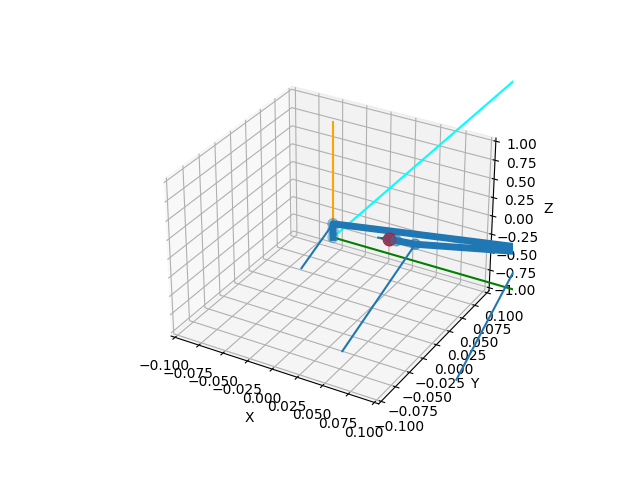

In [15]:
# Optional: support for 3D plotting in the NB
# If there is a matplotlib error, uncomment the next line, and comment the line below it.
# %matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
my_chain.plot(my_chain.inverse_kinematics(target_position), ax, target=target_position)
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)

You're done! Go to the [tutorials](https://github.com/Phylliade/ikpy/blob/master/tutorials/ikpy/getting_started.md) to understand the general concepts of the library.